<a href="https://colab.research.google.com/github/Pigwen/fastbook/blob/main/Ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastbook
!pip install nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import pathlib
from google.colab import userdata

key = os.environ.get("AZURE_SEARCH_KEY", userdata.get("bing_key"))

bear_types = ["grizzly", "black", "teddy"]
path = Path("bear")
#path.delete()

if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path / o)
    dest.mkdir(exist_ok=True)
    print(f"dest is {dest}")
    results = search_images_bing(key, f"{o} bear")
    print(f"finish search '{o} bear'")
    download_images(dest, urls=results.attrgot("contentUrl"))
    print(f"finish downloading {o} bear")

fns = get_image_files(path)
failed = verify_images(fns)
print(failed)

failed.map(Path.unlink)

dest is bear/grizzly
finish search 'grizzly bear'


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish downloading grizzly bear
dest is bear/black
finish search 'black bear'
finish downloading black bear
dest is bear/teddy
finish search 'teddy bear'
finish downloading teddy bear
[Path('bear/black/bd0f78a9-f9c5-4759-8356-8cc9b00b2f0b.jpg'), Path('bear/black/b4fddb78-8273-438b-976b-27ff51c17bea.jpg'), Path('bear/black/fa63b68c-f295-4cfd-9c2b-477b965bf4d8.jpg'), Path('bear/teddy/6be92f78-4508-4236-b884-7eb1dcc08915.jpg'), Path('bear/teddy/5d815461-674e-4ef2-a233-339df5178e26.jpg'), Path('bear/teddy/4f1be4d6-11ac-401e-b055-650a16a233e7.jpg'), Path('bear/teddy/4b6857f1-4838-42cb-ad77-c25effaf35bf.jpg'), Path('bear/teddy/d87fb909-8027-4aef-8e3e-5fe517eb36ae.jpg'), Path('bear/teddy/d2dcdaaa-1e73-43ca-8910-9a9f3dfc2f7d.JPG'), Path('bear/teddy/b22fe4fc-b4fe-452b-9f1f-1ad8689e1057.jpg'), Path('bear/grizzly/999884d6-451c-4df0-af1a-3ef162cd9f4d.jpg'), Path('bear/grizzly/d2b68993-07a8-4e5a-a044-5a6679c2726e.jpg')]


(#12) [None,None,None,None,None,None,None,None,None,None...]

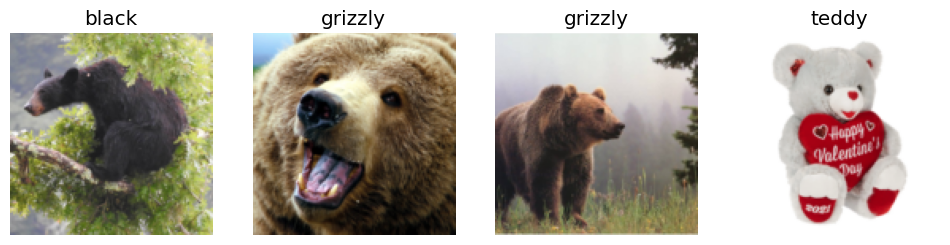

In [5]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


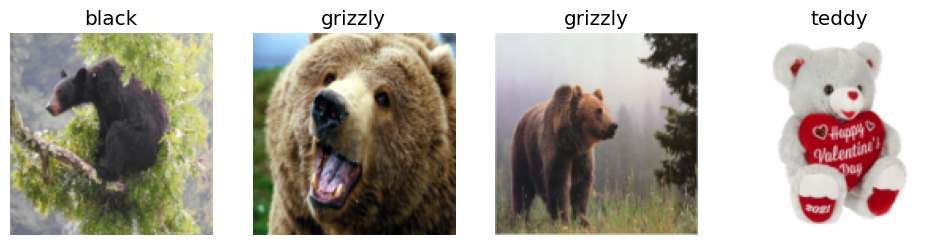

In [6]:
bears2 = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears2.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

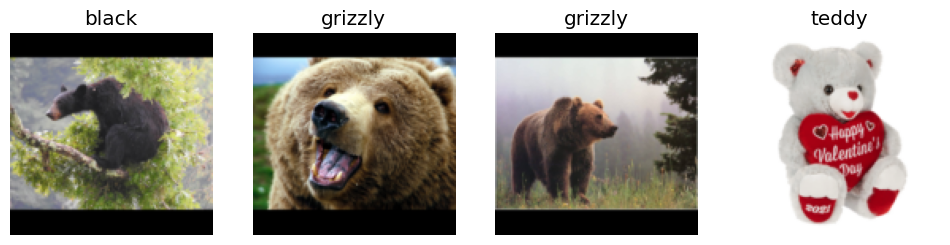

In [7]:
bears2 = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = bears2.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

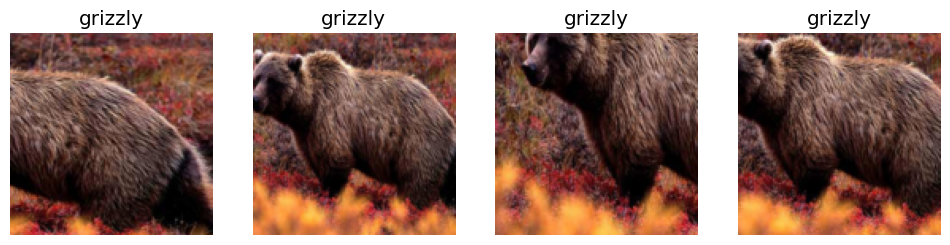

In [8]:
bears2 = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears2.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

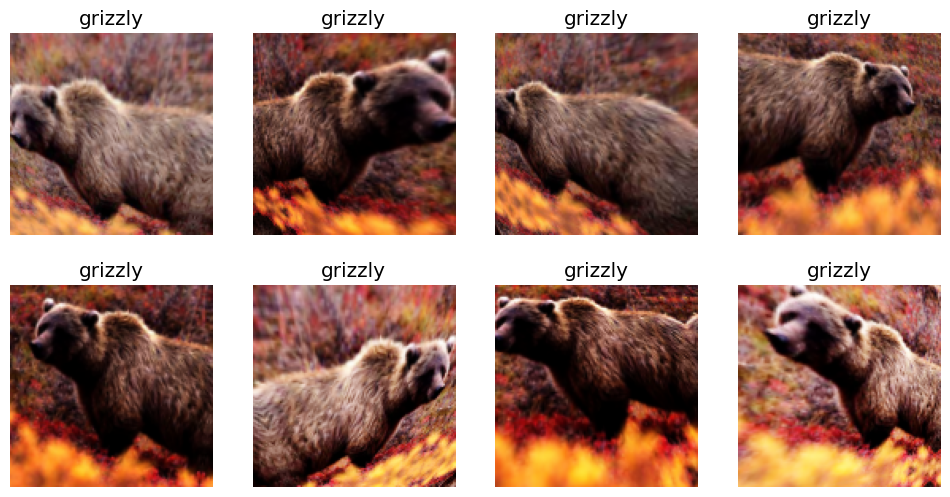

In [9]:
bears3 = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears3.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [10]:
doc(bears.new)

In [11]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = bears.dataloaders(path)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 89.3MB/s]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


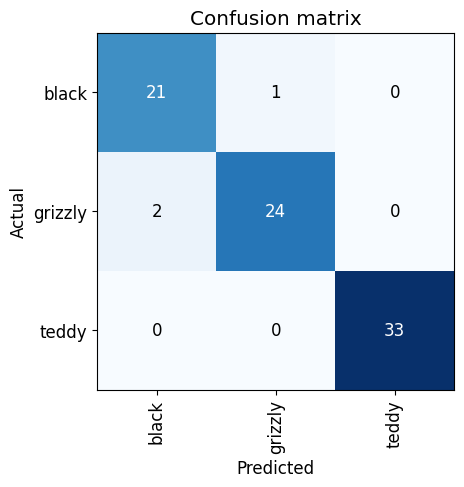

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

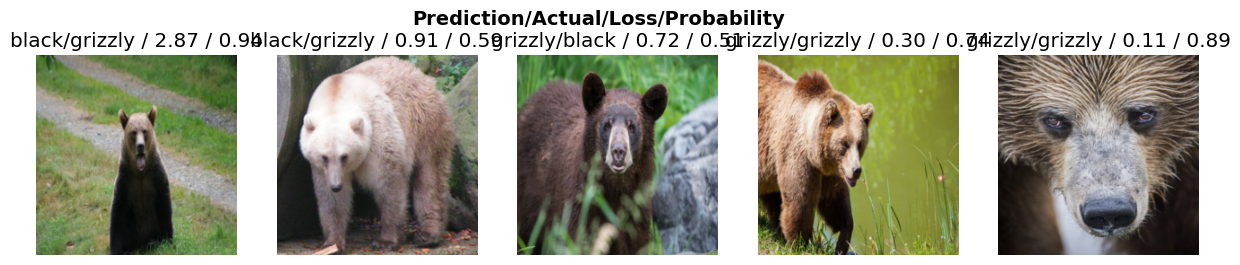

In [13]:
interp.plot_top_losses(5, nrows=1)

In [14]:
clearner = ImageClassifierCleaner(learn)
clearner

In [15]:
doc(clearner.fns)